In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/sales.csv')
df.head()

sale_id branch         city customer_type  gender  product_name  \
0        1      A     New York        Member    Male       Shampoo   
1        2      B  Los Angeles        Normal  Female      Notebook   
2        3      A     New York        Member  Female         Apple   
3        4      A      Chicago        Normal    Male     Detergent   
4        5      B  Los Angeles        Member  Female  Orange Juice   

  product_category  unit_price  quantity   tax  total_price  reward_points  
0    Personal Care        5.50         3  1.16        17.66              1  
1       Stationery        2.75        10  1.93        29.43              0  
2           Fruits        1.20        15  1.26        19.26              1  
3        Household        7.80         5  2.73        41.73              0  
4        Beverages        3.50         7  1.72        26.22              2

In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sale_id           1000 non-null   int64  
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_name      1000 non-null   object 
 6   product_category  1000 non-null   object 
 7   unit_price        1000 non-null   float64
 8   quantity          1000 non-null   int64  
 9   tax               1000 non-null   float64
 10  total_price       1000 non-null   float64
 11  reward_points     1000 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.9+ KB


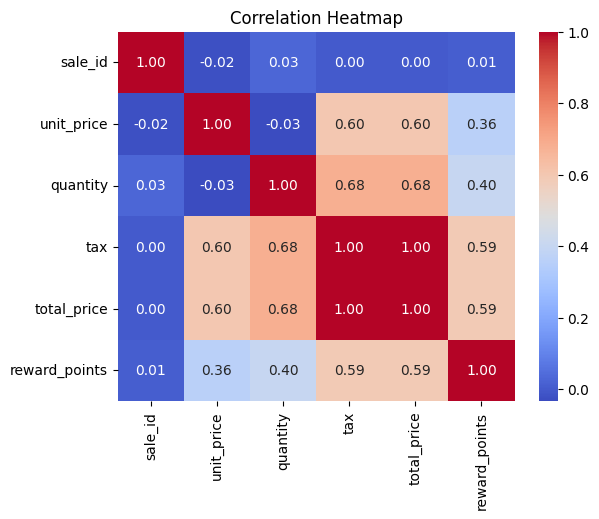

In [6]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

sale_id             0
branch              0
city                0
customer_type       0
gender              0
product_name        0
product_category    0
unit_price          0
quantity            0
tax                 0
total_price         0
reward_points       0
dtype: int64

In [9]:
palette = sns.color_palette("viridis", len(df['city'].unique()))

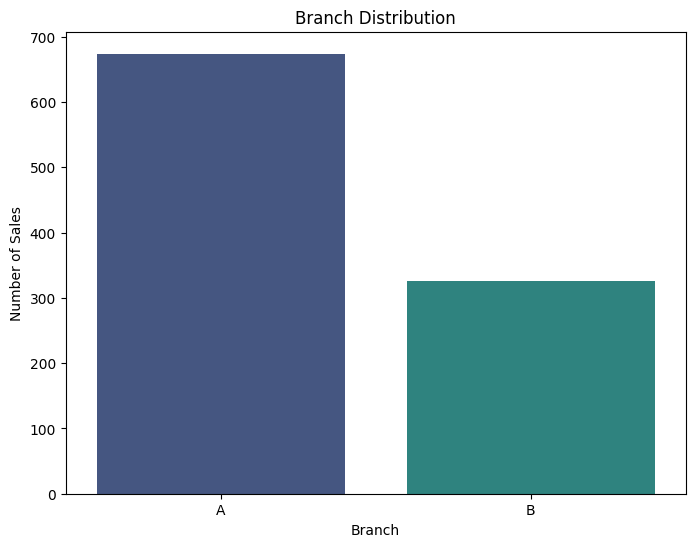

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='branch', palette = palette)
plt.title('Branch Distribution')
plt.xlabel('Branch')
plt.ylabel('Number of Sales')
plt.show()

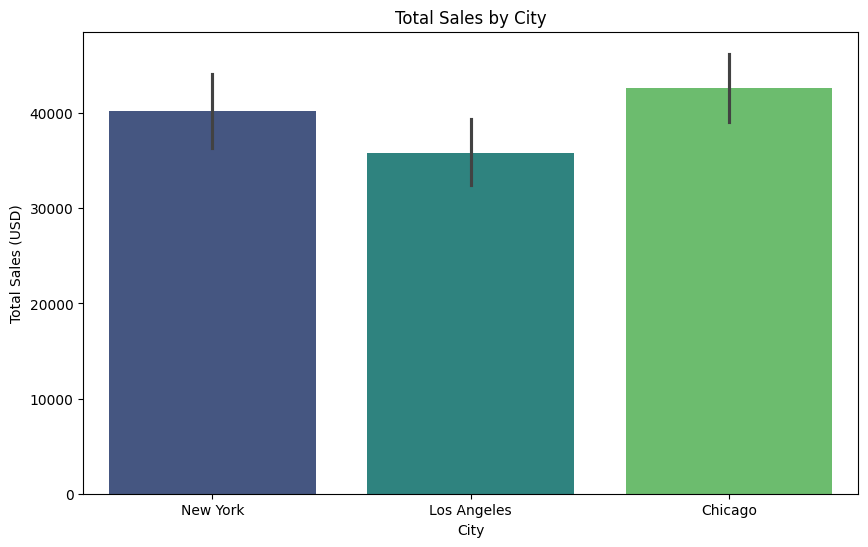

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='city', y='total_price', estimator=sum, palette=palette)
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales (USD)')
plt.show()

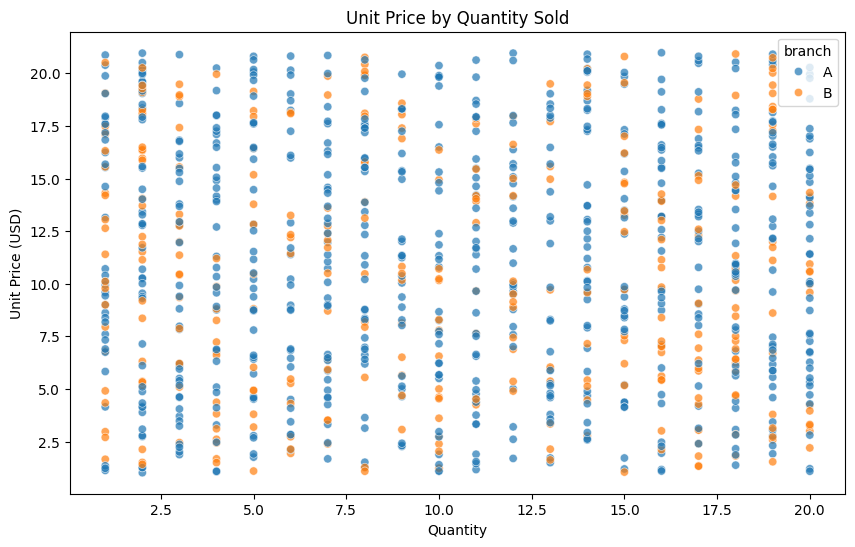

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='quantity', y='unit_price', hue='branch', alpha=0.7)
plt.title('Unit Price by Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Unit Price (USD)')
plt.show()

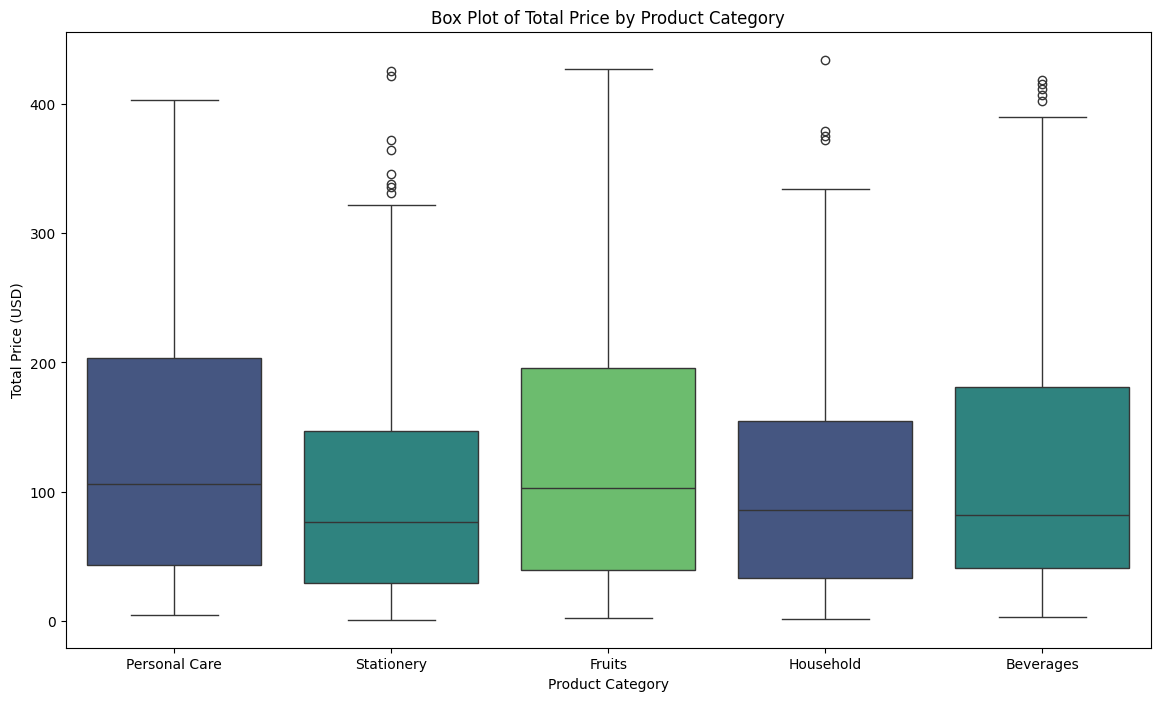

In [13]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='product_category', y='total_price', palette = palette)
plt.title('Box Plot of Total Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Price (USD)')
plt.show()

<Figure size 1400x800 with 0 Axes>

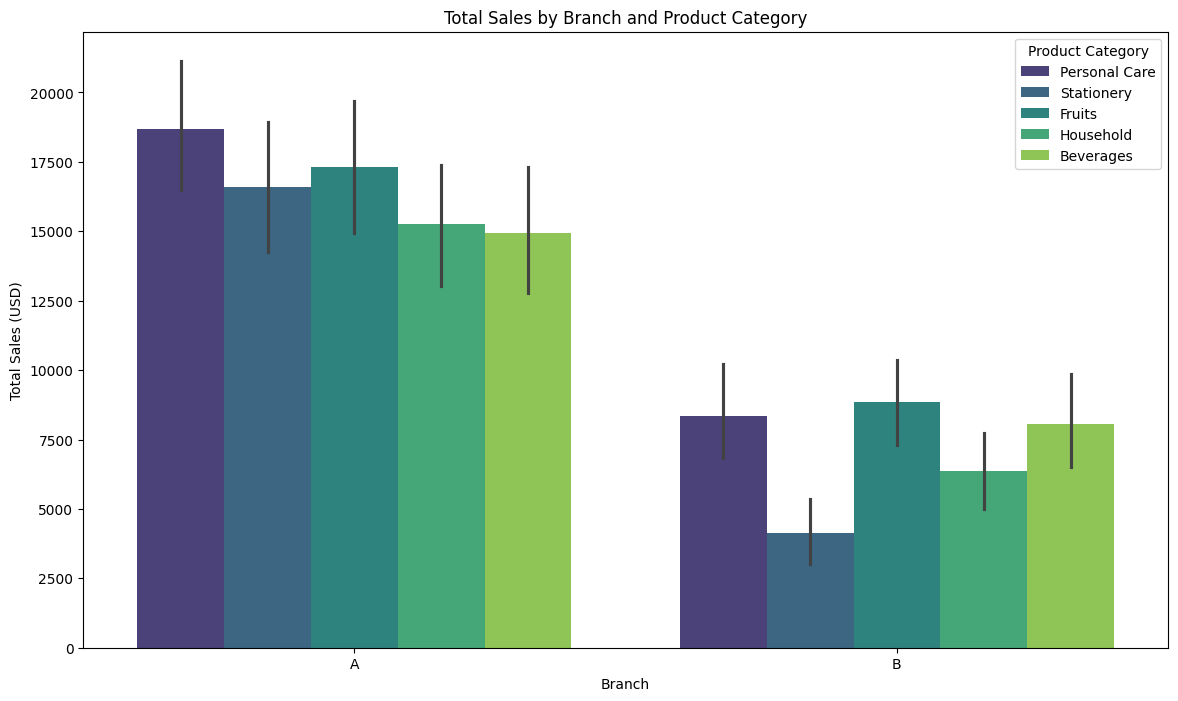

In [15]:
plt.figure(figsize=(14, 8))
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='branch', y='total_price', hue='product_category', estimator=sum, palette='viridis')
plt.title('Total Sales by Branch and Product Category')
plt.xlabel('Branch')
plt.ylabel('Total Sales (USD)')
plt.legend(title='Product Category')
plt.show()

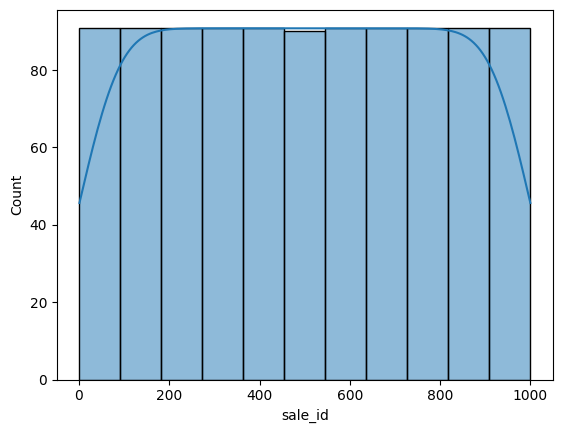

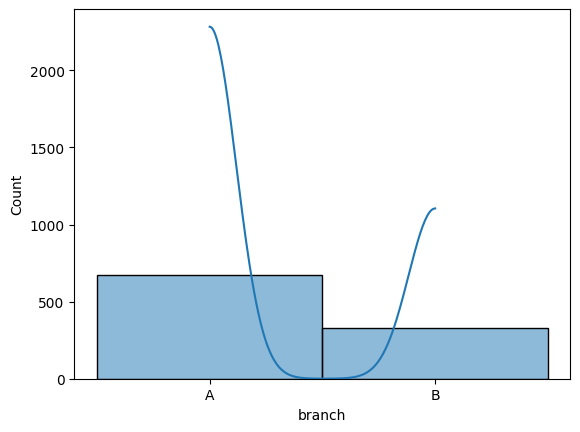

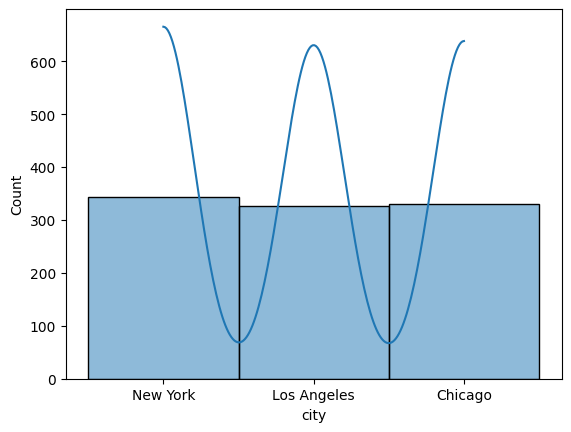

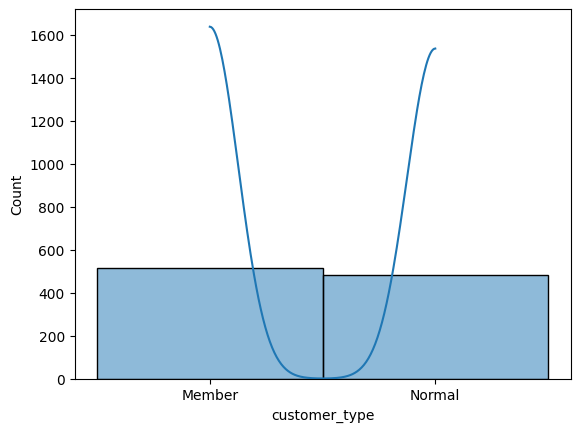

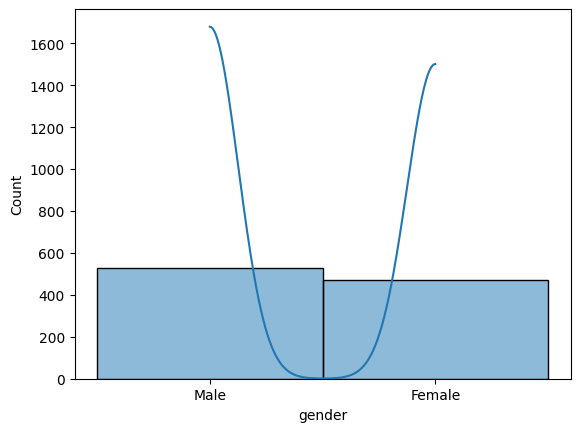

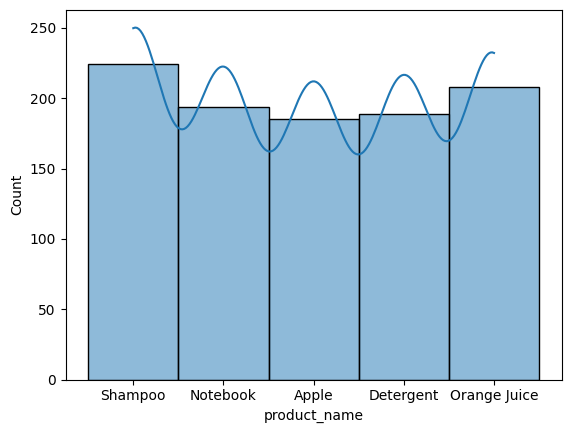

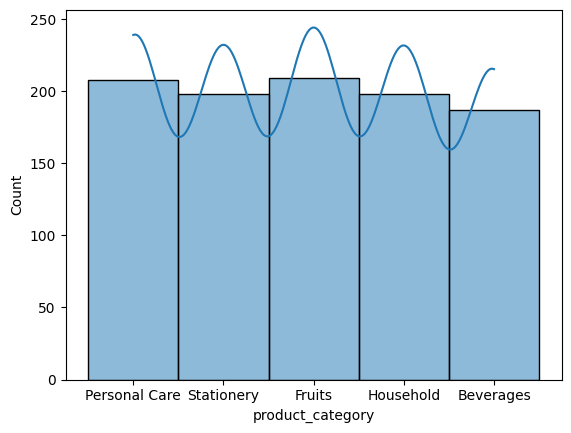

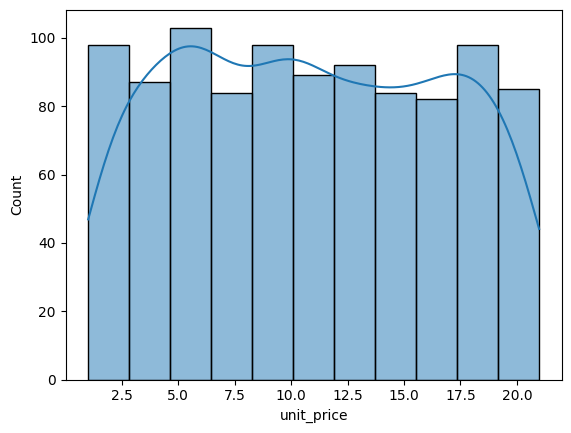

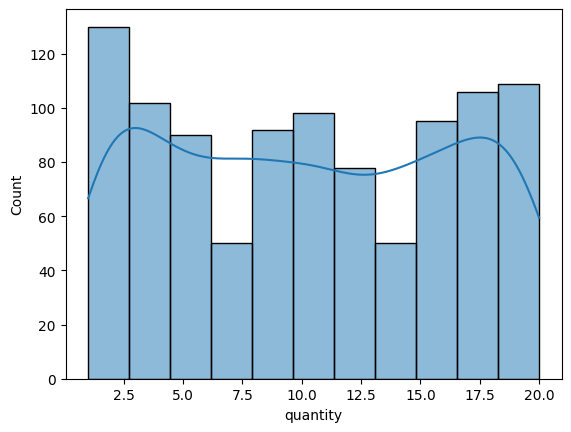

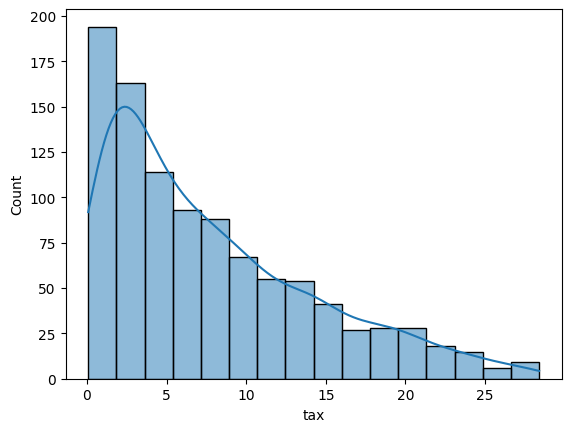

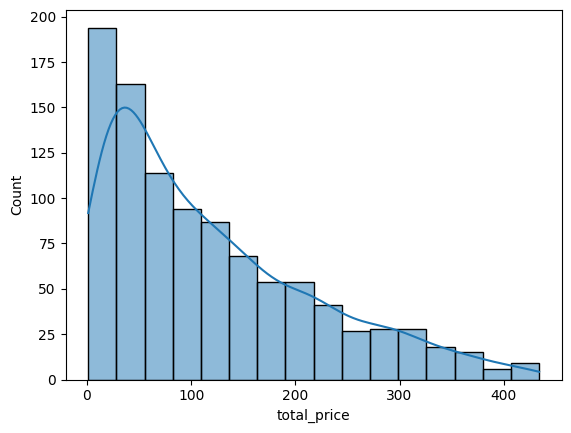

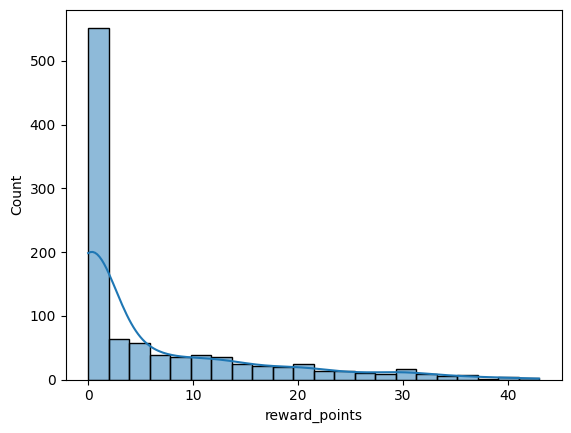

In [16]:
for col in df:
  sns.histplot(x=col,data=df,kde=True)
  plt.show()

In [20]:
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns =['ship_id',
 'ship_type',
 'route_id',
 'month',
 'distance',
 'fuel_type',
 'fuel_consumption',
 'CO2_emissions',
 'weather_conditions',
 'engine_efficiency']
# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']

            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count'
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial"),
                xaxis={'categoryorder': 'total descending'}
            )

            # Show the figure
            fig.show()

        # For numerical data
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'}
            )

            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=18, family="Arial")
            )

            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")

Column ship_id does not exist in the DataFrame
Column ship_type does not exist in the DataFrame
Column route_id does not exist in the DataFrame
Column month does not exist in the DataFrame
Column distance does not exist in the DataFrame
Column fuel_type does not exist in the DataFrame
Column fuel_consumption does not exist in the DataFrame
Column CO2_emissions does not exist in the DataFrame
Column weather_conditions does not exist in the DataFrame
Column engine_efficiency does not exist in the DataFrame
